# Beginner Novice Eventing Incompleted Scores | Exploratory Data Analysis

First, we want to load all the necessary libraries and read in the data to be used.  We will show the first 6 entries in the table to see what the data looks like.

In [4]:
#load libraries
library(Hmisc)
library(ggplot2)
library(dplyr)
#read in files
incompletedScores <- read.csv(file="incompletedScores.csv", header=TRUE)
completedScores <- read.csv(file="scores.csv", header=TRUE)
head(incompletedScores)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division
34.4,16,0,0,34.4,12,0,NA,NA,RF,2018,A
31.1,8,E,NA,NA,E,NA,NA,NA,E,2018,A
32.0,15,0,0,32.0,9,0,NA,NA,RF,2017,A
30.8,5,20,NA,NA,RF,NA,NA,NA,RF,2017,A
33.3,15,20,NA,NA,TE,0,4,NA,TE,2016,A
33.8,16,E,NA,NA,E,NA,NA,NA,E,2016,A


Next, let's take a quick look at the total possible values for incompleted scores.  This will give us an idea of how many different types of elimination there are and how common they are.  The most common types of elimination are RF, meaning rider fall, and E, meaning that the competitor was eliminated for too many refusals.  Together, RF and E make up 60.4% of incomplete scores.

In [36]:
describe(incompletedScores$Final.Place)

incompletedScores$Final.Place 
       n  missing distinct 
      48        0        6 
                                              
Value          E    MR     R    RF    TE     W
Frequency     12     1     5    17     5     8
Proportion 0.250 0.021 0.104 0.354 0.104 0.167

Next let's look at the types of elimination grouped by Division.  We can see that the Junior division has the highest number of eliminations.  However, this doesn't mean that Juniors are more likely to be eliminated.  It's important to note that there are more entries in the Junior division than in others, which can explain the larger number of eliminations.  In order to find the group with the highest ratio of incompletes, we will need to combine the completed and incompleted data tables (see below).

The Horse division only has two types of eliminations: R (retired) and W (withdrew).  It is interesting to note because the Horse division is normally populated with more experienced riders.  It seems intuitive that there are no rider falls or technical eliminations in the Horse division because professional riders seem less likely to make those mistakes.

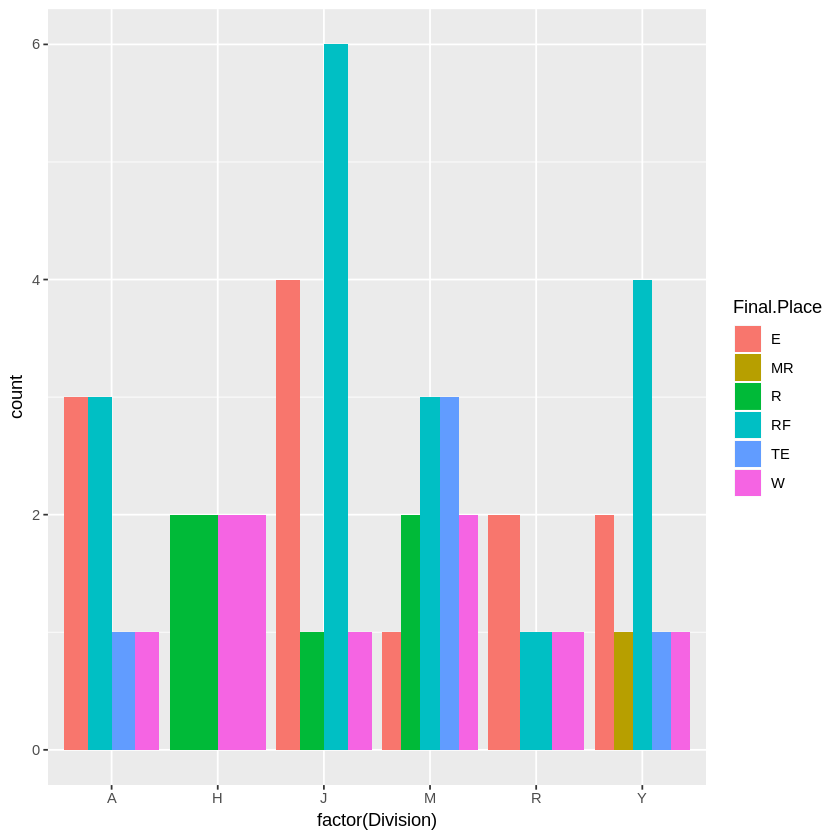

In [43]:
ggplot(incompletedScores, aes(x=factor(Division), fill=Final.Place))+geom_bar(position=position_dodge())

In order to see which division has the highest percentage of incompleted scores, we need to add another column to the data tables indicating whether or not the competitor completed.  Then, the incomplete scores and the complete scores can be combined into one single table.

The following lines add the new columns to the tables individually, then combine them together to create one master table.

In [46]:
#add new columns
incompletedScores["Completed"] <- "No"
completedScores["Completed"]<- "Yes"
#combine scores into one table
total <- rbind(completedScores, incompletedScores)
head(total)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division,Completed
24.5,1,0,0.0,24.5,1,0,0,24.5,1,2018,A,Yes
28.1,4,0,0.4,28.5,2,0,0,28.5,2,2018,A,Yes
30.5,6,0,0.0,30.5,4,0,0,30.5,3,2018,A,Yes
31.1,8,0,0.0,31.1,6,0,0,31.1,4,2018,A,Yes
32.0,11,0,0.0,32.0,8,0,0,32.0,5,2018,A,Yes
32.5,13,0,0.0,32.5,10,0,0,32.5,6,2018,A,Yes


The bar plot below shows the percentage of completed and incompleted scores for each division.  We can see that the ratio of incomplete competitors is highest for the Master division at 13.9%.  The lowest is the Horse division at 5.5%.

Overall, the lowest entries are in the Rider Division.

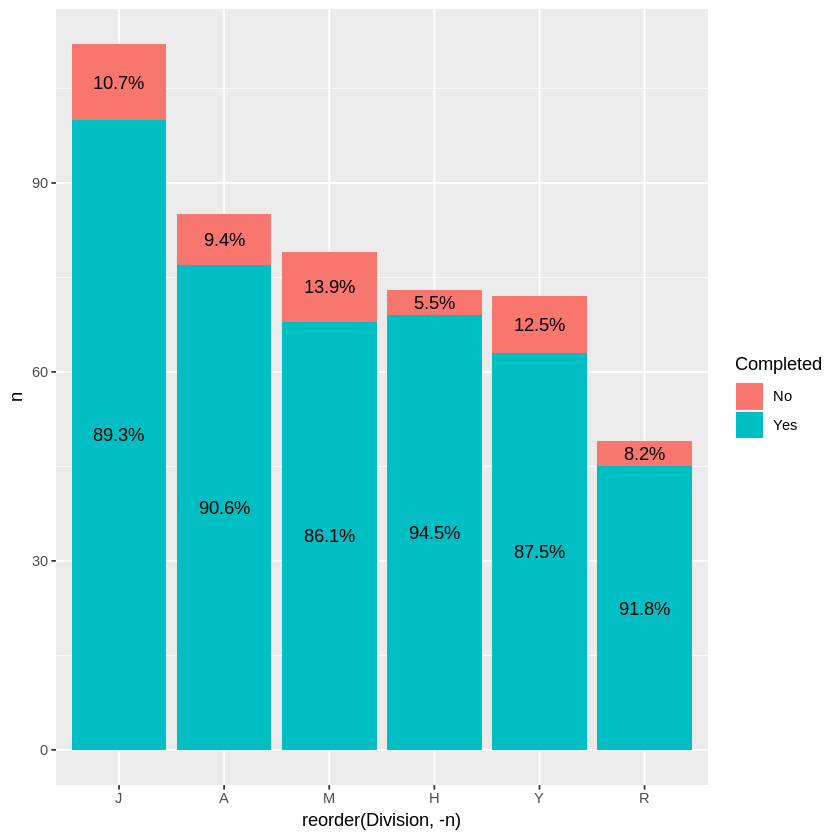

In [48]:
ggplot(total %>% count(Division, Completed) %>% group_by(Division) %>%
         mutate(percent=n/sum(n)),
         aes(reorder(Division, -n), n, fill=Completed)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5))

In order to see if the competition courses were fair from year-to-year, we can sort the percentage of incomplete competitors by year.  We can see that there were less entries in 2018 than in 2016 and 2017, and that the percentage of incompletes is lowest in 2018.  It would be interesting to continue to track the number of entries and the percentage of incompletes throughout the years.

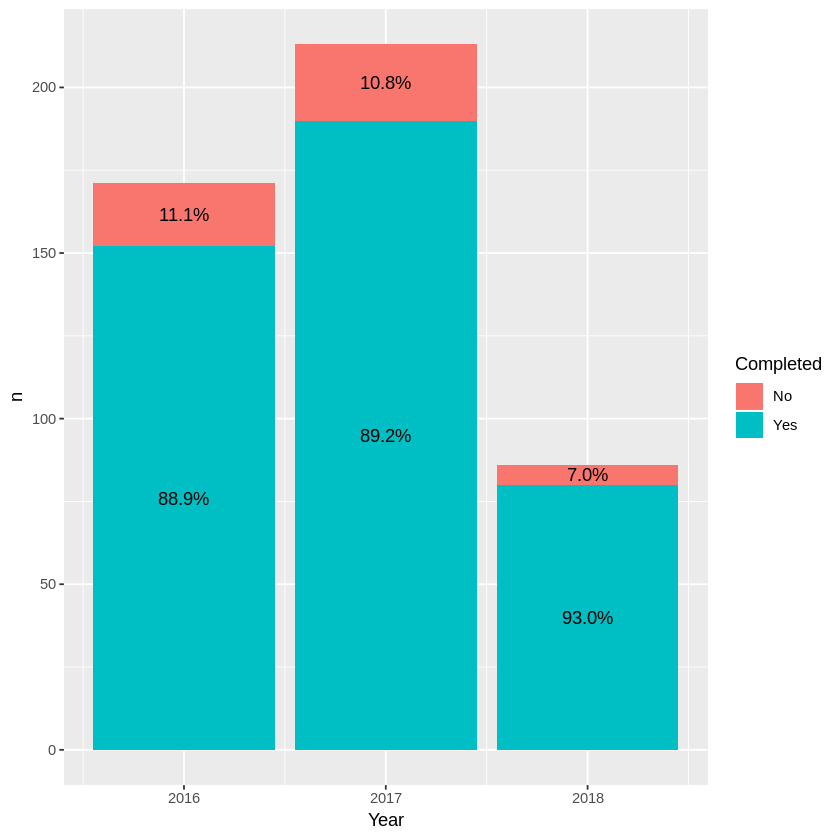

In [51]:
ggplot(total %>% count(Year, Completed) %>% group_by(Year) %>%
         mutate(percent=n/sum(n)),
         aes(Year, n, fill=Completed)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5))